In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


# قراءة البيانات من ملف CSV
data = pd.read_csv("knnw.csv")

# تقسيم البيانات إلى مجموعة الميزات (X) ومجموعة الأهداف (y)
x = data[['Cigarettes', 'Weight']]
y = data['Heart Attack']
label_encoder= LabelEncoder()
y_encoded = label_encoder.fit_transform(y)




In [5]:
knn= KNeighborsClassifier(n_neighbors=5)

In [6]:
knn.fit(x,y_encoded)

KNeighborsClassifier()

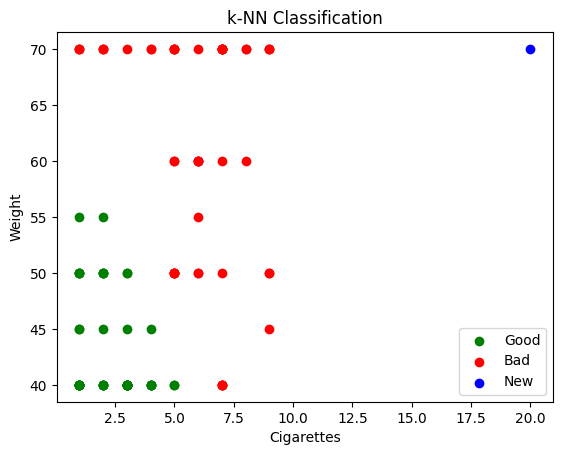

Predicted Class: Bad


In [7]:
# قراءة البيانات من ملف CSV
data = pd.read_csv("knnw.csv")

# تقسيم البيانات إلى مجموعة الميزات (X) ومجموعة الأهداف (y)
x = data[['Cigarettes', 'Weight']]
y = data['Heart Attack']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x, y_encoded)

# البيانات الجديدة للتنبؤ
new_data = pd.DataFrame({'Cigarettes': [20], 'Weight': [70]})

# تحويل البيانات الجديدة إلى تنسيق الميزات
new_x = new_data[['Cigarettes', 'Weight']]

# التنبؤ باستخدام النموذج
prediction = knn.predict(new_x)

# ترجمة القيمة المنبوءة إلى الفئة الأصلية
predicted_class = label_encoder.inverse_transform(prediction)[0]

# رسم البيانات المصنفة
classification = knn.predict(x)
data['Classification'] = label_encoder.inverse_transform(classification)

# رسم البيانات المصنفة كـ "جيد" فقط
good_data = data[data['Classification'] == 'Good']
plt.scatter(good_data['Cigarettes'], good_data['Weight'], color='green', label='Good')

# رسم البيانات المصنفة كـ "سيئ"
bad_data = data[data['Classification'] == 'Bad']
plt.scatter(bad_data['Cigarettes'], bad_data['Weight'], color='red', label='Bad')

# رسم البيانات الجديدة
plt.scatter(new_data['Cigarettes'], new_data['Weight'], color='blue', label='New')

plt.xlabel('Cigarettes')
plt.ylabel('Weight')
plt.title('k-NN Classification')

plt.legend()
plt.show()

print("Predicted Class:", predicted_class)